# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [3]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [4]:
def conv_fn(x,h):
     
    T=np.zeros((len(x), len(h)+len(x)-1)) #Create a temporary matrix to store the result of each multiplication
    
    for i in range (0,len(x)): #Compute each multiplications needed for the convultion and store them into a matrix with blank space to do the 'column method'
        for n in range (0,len(h)):
            T[i][n+i]=x[i]*h[n] 
            
    R = [0] * (len(h)+len(x)-1) #Create a list to store the result of the convolution
            
    for i in range (0,len(R)): #Compute convolution using the 'column method'
        for n in range (0, len(x)):
            R[i]=T[n][i]+R[i]
        
    return(R) #Return the result
    

In [5]:
X = [1, 2, 3, 4]
H1 = [-1, 1]
Dirac = [1, 0, 0, 0, 0]
Step = [1, 1, 1, 1, 1]
Exp=[np.exp(0),np.exp(1),np.exp(2),np.exp(3),np.exp(4),np.exp(5)]

print('For the input signal ', H1, 'the output signal is ', conv_fn(X, H1))
print('For the input signal ', Dirac, 'the output signal is ', conv_fn(X, Dirac))
print('For the input signal ', Step, 'the output signal is ', conv_fn(X, Step))
print('For the input signal ', Exp, 'the output signal is ', conv_fn(X, Exp))

For the input signal  [-1, 1] the output signal is  [-1.0, -1.0, -1.0, -1.0, 4.0]
For the input signal  [1, 0, 0, 0, 0] the output signal is  [1.0, 2.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0]
For the input signal  [1, 1, 1, 1, 1] the output signal is  [1.0, 3.0, 6.0, 10.0, 10.0, 9.0, 7.0, 4.0]
For the input signal  [1.0, 2.7182818284590451, 7.3890560989306504, 20.085536923187668, 54.598150033144236, 148.4131591025766] the output signal is  [1.0, 4.7182818284590446, 15.825619755848741, 47.018494606426103, 127.80951949014771, 347.42229433415071, 540.96291599733661, 663.63207744030672, 593.6526364103064]


A symmetric version of x, would be [1, 2, 3, 4, 4, 3, 2, 1]
A periodic version of x would be [1, 2, 3, 4, 1, 2, 3, 4]
A constant value padding of x would be [5, 5, 1, 2, 3, 4, 5, 5]

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [21]:
def conv2d(image, kernel):
    
    Hei, Wid = image.shape[:] #Get the size of the image, the kernel and create a resulting image
    R = np.zeros((Hei, Wid))
    SKernel = len(kernel)
    
    for n in range (0, Hei): #For all pixels of the image,
        for p in range (0, Wid):
            
            for q in range (int(-(SKernel-1)/2), int((SKernel-1)/2+1 #For all the values of the kernel,
                for r in range (int(-(SKernel-1)/2), int((SKernel-1)/2+1)):
                    
                    if ((Hei-(SKernel-1)/2+q<0) | ((Wid-(SKernel-1)/2+r)<0)): #Exclude the boudaries of the image,
                        R[n][p] = R[n][p]
                    elif ((n+q>=Hei) | (p+r>=Wid)):
                        R[n][p] = R[n][p]
                        
                    else:
                        R[n][p] = R[n][p]+image[n+q][p+r]*kernel[q][r] #Compute the convolution
    
    return R #Return the convolved image

C:\Users\dreve\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


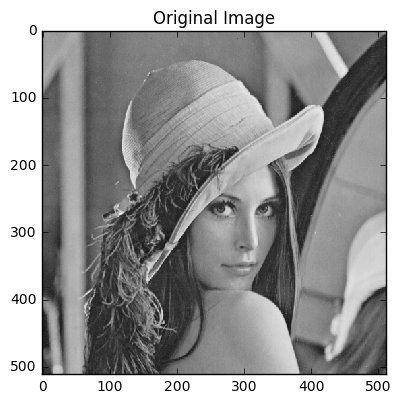

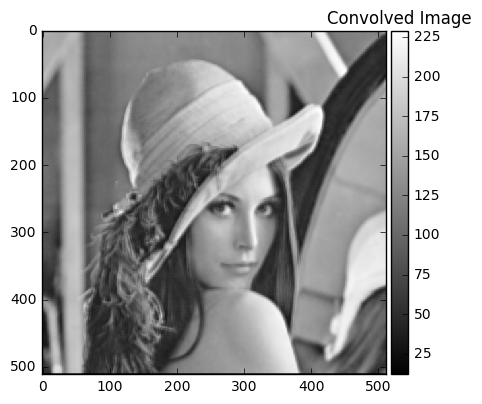

In [26]:
GaussianK = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4,1]]) #Create the Gaussian kernel
GaussianK = GaussianK/256

Path = '../images/' # Importing the image and apply the convolution on it
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_conv = conv2d(lena_im, GaussianK)

plt.figure() #Plot the Original and the convolved image
io.imshow(lena_im)
plt.title('Original Image')
plt.figure()
io.imshow(lena_conv, cmap=cm.gray)
plt.title('Convolved Image')

C:\Users\dreve\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


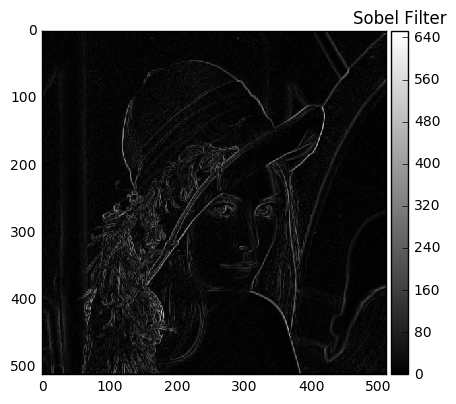

In [30]:
from math import sqrt

SobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #Create the sobel filters
SobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

lena_SobX = conv2d(lena_im, SobelX) #Apply the Sobel convolutions
lena_SobY = conv2d(lena_im, SobelY)

HeiLena, WidLena = lena_im.shape[:] #Get the size of the image and create the image to do the gradiant calculation
lena_Sobel = np.zeros((HeiLena, WidLena))

for n in range (0, HeiLena): #Do the gradiant calculation
    for p in range (0, WidLena):
        lena_Sobel[n][p] = sqrt(lena_SobX[n][p]*lena_SobX[n][p]+lena_SobY[n][p]*lena_SobY[n][p])
     
plt.figure() #Display the gradiant image
io.imshow(lena_Sobel, cmap=cm.gray)
plt.title('Sobel Filter')

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

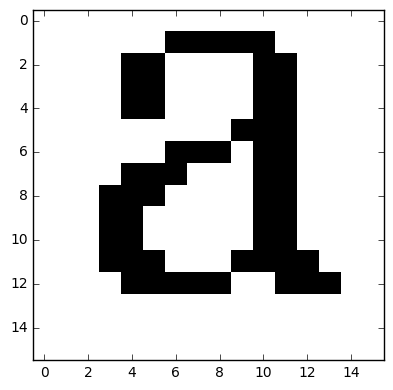

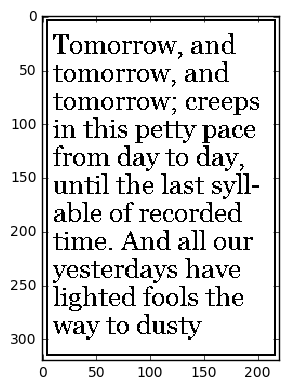

In [34]:
from skimage.filters import threshold_otsu #Import the functions needed
from skimage.color import rgb2gray

Path = '../images/' #Import the 'a' image and apply the Otsu transformation
a_im = io.imread(Path.__add__('a.png'))
a_gray = rgb2gray(a_im)
a_Thr = threshold_otsu(a_gray)
a_Otsu = a_gray >= a_Thr

text_im = io.imread(Path.__add__('text.png')) #Import the 'text' image and apply the Otsu transformation
text_gray = rgb2gray(text_im)
text_Thr = threshold_otsu(text_gray)
text_Otsu = text_gray >= text_Thr

plt.figure() #Display the two images after the Otsu transformation
io.imshow(a_Otsu)
plt.figure()
io.imshow(text_Otsu)